# Author : Sangati Sharan
# Task 6 : Prediction Using Decision Tree Algorithm
# GRIP @ The Sparks Foundation

## Importing the Relevant Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn.metrics as sm
import pydot
%matplotlib inline

## Loading the Dataset

In [62]:
dataset = pd.read_csv("Iris.csv", index_col=0)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [64]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Input Data Visualization

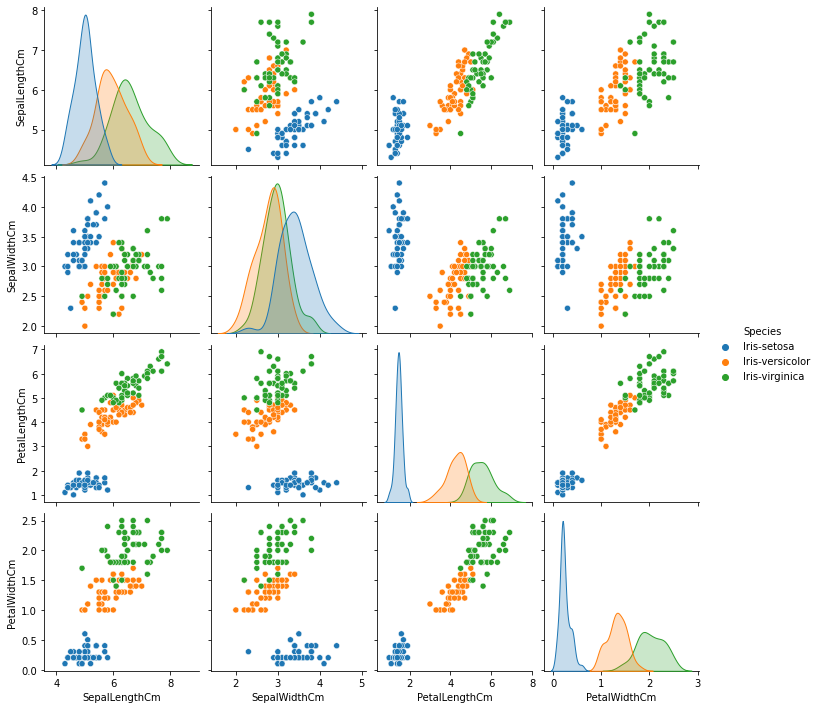

In [65]:
sns.pairplot(dataset, hue = 'Species')

## Finding the Correlation Matrix

In [66]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

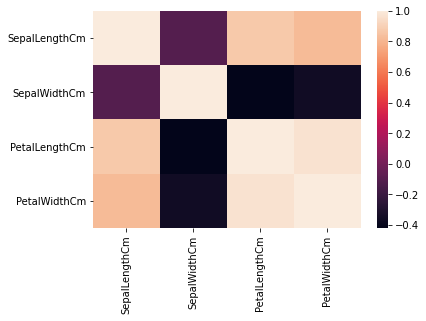

In [67]:
sns.heatmap(dataset.corr())

## Data Preprocessing

In [74]:
target = dataset['Species']
data = dataset.copy()
data = data.drop('Species', axis = 1)
data.shape
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [86]:
from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:,:-1].values
le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])
y = dataset['Species'].values
dataset.shape
dataset.head()
# 0 denotes iris-setosa
# 1 denotes iris-versicolor
# 2 denotes iris-virginica

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


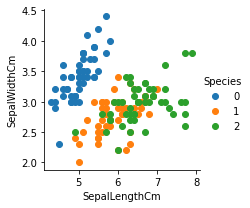

In [84]:
sns.FacetGrid(dataset, hue = 'Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

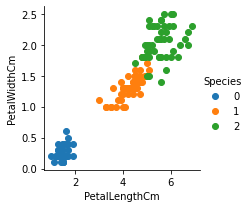

In [85]:
sns.FacetGrid(dataset, hue = 'Species').map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
plt.show()

## Training the model

### Splitting the Dataset into Training Set and Test Set

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape

(120, 4)

### Defining Decision Tree Algorithm

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [95]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

## Classification Report and Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = dtree.predict(x_test)
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [97]:
print ('Acuuracy:', sm.accuracy_score(y_test, y_pred))

Acuuracy: 1.0


### Confusion Matrix

In [98]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Visualization of the trained model

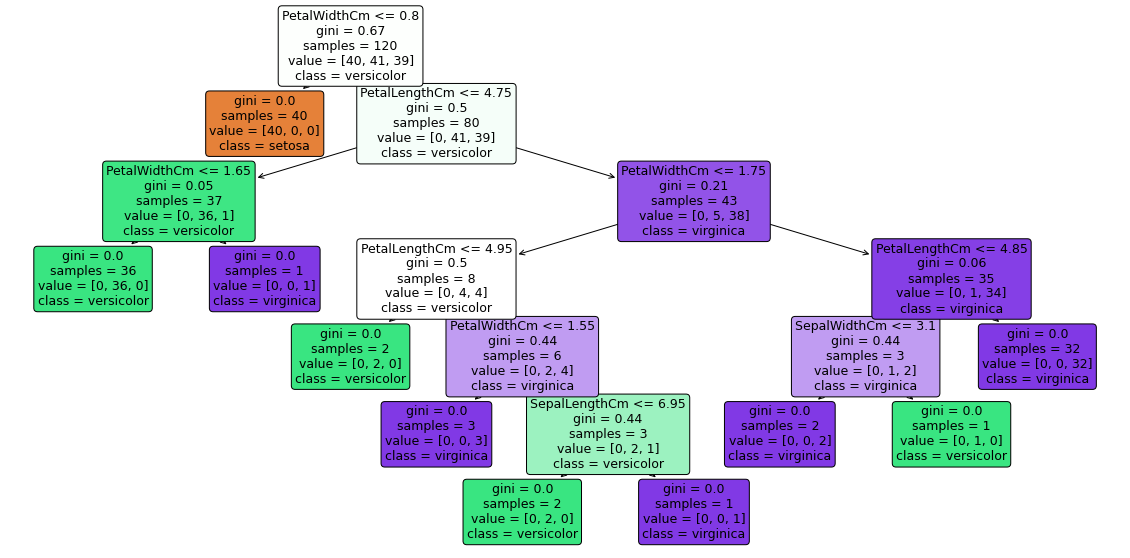

In [102]:
plt.figure(figsize = (20,10))
tree = plot_tree(dtree,
                feature_names = data.columns, 
                precision = 2,
                rounded = True,
                filled = True,
                class_names = ['setosa', 'versicolor', 'virginica']
                )

## Checking the model for a random input

In [103]:
dtree.predict([[4.6, 3.1, 1.5, 0.2]])

array([0], dtype=int64)

In [104]:
# 0 signifies the iris-setosa.

#### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.